# Topic Analysis - Country

##### Grace Chen

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
label_data = pd.read_csv("preliminary_data/GNI88.csv")
label_data.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Source Religion,Legacy Source Tag,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group
0,2018-01-10,3759306,North Korea makes deals and threats,7023849,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
1,2018-01-10,3759306,North Korea makes deals and threats,7023842,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
2,2018-01-10,3759306,North Korea makes deals and threats,7023839,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
3,2018-01-10,3759306,North Korea makes deals and threats,7023833,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Negative,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN
4,2018-01-10,3759306,North Korea makes deals and threats,7023846,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,Unknown,Unknown,None (Legacy Other),Washington Post,NaN,"Fifield, Anna",NaN,NaN,NaN,NaN


In [3]:
article_data = pd.read_json("preliminary_data/gni88.json", lines=True)
article_data.head()

,Article ID,Headline,Content,Media Name,Author,Published Date
0,3777409,Modernized Tu-160 to boost Russia's long-range...,Modernized Tu-160 to boost Russia's long-range...,Defense News,"Bodner, Matthew",2018-02-15 00:00:00+00
1,3764250,Give Trump more nuclear weapons and more ways ...,Give Trump more nuclear weapons and more ways ...,CNN,"Collina, Tom Z.",2018-02-02 00:00:00+00
2,3764251,Trump wants to build smaller atomic weapons; R...,Trump wants to build smaller atomic weapons; R...,Los Angeles Times,"Cloud, David",2018-02-03 00:00:00+00
3,3764252,Egypt and Israel Secretly Allied In Sinai Battle,Egypt and Israel Secretly Allied In Sinai Batt...,The New York Times,"Kirkpatrick, David D.",2018-02-04 00:00:00+00
4,3764253,Listen: Top Armed Services Dem worried about r...,Listen: Top Armed Services Dem worried about r...,The Hill,"Simendinger, Alexis",2018-02-03 00:00:00+00


### Choosing columns

In [4]:
topic_data = label_data[['Article ID', 'Headline', 'Quote ID','Messages', 'Submessages', 'QText']]
topic_data.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a..."
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy..."
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we..."


In [5]:
article_data = article_data[["Article ID", "Content"]]
article_data.head()

,Article ID,Content
0,3777409,Modernized Tu-160 to boost Russia's long-range...
1,3764250,Give Trump more nuclear weapons and more ways ...
2,3764251,Trump wants to build smaller atomic weapons; R...
3,3764252,Egypt and Israel Secretly Allied In Sinai Batt...
4,3764253,Listen: Top Armed Services Dem worried about r...


### Combining DataFrames

In [6]:
merged_df = pd.merge(topic_data, article_data, how="inner", on="Article ID")
merged_df.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...,North Korea makes deals and threats\r\n\r\nMed...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a...",North Korea makes deals and threats\r\n\r\nMed...
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table,North Korea makes deals and threats\r\n\r\nMed...
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy...",North Korea makes deals and threats\r\n\r\nMed...
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we...",North Korea makes deals and threats\r\n\r\nMed...


### Does the same article have the same messages labeled? How much does the message labeling depend on the quote texts compared to articles?

In [7]:
article_message = merged_df[["Article ID", "Messages"]].groupby(["Article ID"]).agg(set)
article_message.head()

,Messages
Article ID,
3759261,"{OLD Missile Defense, OLD Proliferation}"
3759262,{OLD Proliferation}
3759263,"{OLD Missile Defense, OLD Foreign Policy Narra..."
3759264,{OLD Proliferation}
3759268,{OLD Missile Defense}


In [8]:
# def has_one_message_only(s):
#     return len(s) == 1

article_message["count"] = article_message["Messages"].apply(len)
article_message.head()

,Messages,count
Article ID,,
3759261,"{OLD Missile Defense, OLD Proliferation}",2
3759262,{OLD Proliferation},1
3759263,"{OLD Missile Defense, OLD Foreign Policy Narra...",3
3759264,{OLD Proliferation},1
3759268,{OLD Missile Defense},1


In [9]:
article_message = article_message.reset_index()
article_message_count = article_message[["Article ID", "count"]].groupby("count").count()
article_message_count

,Article ID
count,
1,53321
2,12046
3,1745
4,225
5,27
6,2
7,1


### Conclusion: Messages are quote based not article based. Most of the articles have one messages, however, some have 2 messages and some have >3 messages. 

## Set up useful functions for analysis 

In [10]:
merged_df["Messages"] = merged_df["Messages"].str.replace("OLD Iran", "Iran")
merged_df.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...,North Korea makes deals and threats\r\n\r\nMed...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a...",North Korea makes deals and threats\r\n\r\nMed...
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table,North Korea makes deals and threats\r\n\r\nMed...
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy...",North Korea makes deals and threats\r\n\r\nMed...
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we...",North Korea makes deals and threats\r\n\r\nMed...


In [11]:
import re

In [12]:
def find_country_freq(text):
#     country_freq = {"North Korea": 0, "South Korea": 0, "Iran": 0, "China": 0, "India": 0, 
#                     "Israel": 0, "Pakistan": 0, "Russia": 0, "KSA": 0,
#                    "Turkey": 0, "Britain": 0, "France": 0, "U.S.": 0}
    country_freq = {"North Korea": 0, "Iran": 0, "China": 0, "India": 0, 
                    "Israel": 0, "Pakistan": 0, "Russia": 0, "KSA": 0,
                   "Turkey": 0, "U.S.": 0}
    if type(text) == str:
        sentence_pattern = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s"
#         print(text)
        sentences = re.split(sentence_pattern, text)
    #     print(sentences)
        for s in sentences: 
            north_korea_matches = re.findall("North Korea", s)
#             south_korea_matches = re.findall("South Korea", s)
            iran_matches = re.findall("Iran|iran", s)
            china_matches = re.findall("China|Chinese|china|chinese", s)
            india_matches = re.findall("India|india", s)
            israel_matches = re.findall("Israel|israel", s)
            pakistan_matches = re.findall("Pakistan|pakistan", s)
            russia_matches = re.findall("Russia|russia", s)
            ksa_matches = re.findall("KSA", s)
            turkey_matches = re.findall("Turkey|turkey", s)
#             britain_matches = re.findall("British|Britain|U\.K\.", s)
#             france_matches = re.findall("France|france|French|french", s)
            us_matches = re.findall("America|U\.S\.|United States|USA|U\.S\.A\.|US", s)

            country_freq["North Korea"] += len(north_korea_matches)
#             country_freq["South Korea"] += len(south_korea_matches)
            country_freq["Iran"] += len(iran_matches)
            country_freq["China"] += len(china_matches)
            country_freq["India"] += len(india_matches)
            country_freq["Israel"] += len(israel_matches)
            country_freq["Pakistan"] += len(pakistan_matches)
            country_freq["Russia"] += len(russia_matches)
            country_freq["KSA"] += len(ksa_matches)
            country_freq["Turkey"] += len(turkey_matches)
#             country_freq["Britain"] += len(britain_matches)
#             country_freq["France"] += len(france_matches)
            country_freq["U.S."] += len(us_matches)

        total_countries_mentioned = sum(country_freq.values())
        if total_countries_mentioned != 0:
            for key in country_freq.keys():
                country_freq[key] /= total_countries_mentioned
        
    return country_freq

In [13]:
find_country_freq("Russia US relations are at a all time low. Russia.")

{'North Korea': 0.0,
 'Iran': 0.0,
 'China': 0.0,
 'India': 0.0,
 'Israel': 0.0,
 'Pakistan': 0.0,
 'Russia': 0.6666666666666666,
 'KSA': 0.0,
 'Turkey': 0.0,
 'U.S.': 0.3333333333333333}

In [14]:
def get_most_frequent_country(text):
    country_freq = find_country_freq(text)
    if country_freq == None:
        return None
    return max(country_freq, key=country_freq.get)

In [15]:
def is_message_country(msg):
    countries = ["China", "India", "Iran", "Israel", "North Korea", "OLD Iran", "Pakistan", "Russia", "Turkey", "KSA"]
    return msg in countries

message_is_country = merged_df["Messages"].apply(is_message_country)

## Headline Analysis

In [16]:
def has_country_in_headline(headline, country):
    return country in headline

In [17]:
print(has_country_in_headline(merged_df["Content"][0], "North Korea"))

True


In [18]:
merged_df.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...,North Korea makes deals and threats\r\n\r\nMed...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a...",North Korea makes deals and threats\r\n\r\nMed...
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table,North Korea makes deals and threats\r\n\r\nMed...
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy...",North Korea makes deals and threats\r\n\r\nMed...
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we...",North Korea makes deals and threats\r\n\r\nMed...


In [19]:
headlines = merged_df[["Messages", "Headline"]].drop_duplicates()
headlines.head()

,Messages,Headline
0,OLD Proliferation,North Korea makes deals and threats
6,OLD Arms Reduction,"Yes, a cyberattack could spur the president to..."
8,OLD Missile Defense,Missile-alert error reveals uncertainty about ...
9,OLD Proliferation,Five Things You Need to Know to Start Your Day
11,OLD Arms Reduction,Hawaii Lacked Safeguards in Mistaken Missile A...


In [20]:
headlines["most_frequent_country"] = headlines["Headline"].apply(get_most_frequent_country)
headlines.head()

,Messages,Headline,most_frequent_country
0,OLD Proliferation,North Korea makes deals and threats,North Korea
6,OLD Arms Reduction,"Yes, a cyberattack could spur the president to...",North Korea
8,OLD Missile Defense,Missile-alert error reveals uncertainty about ...,North Korea
9,OLD Proliferation,Five Things You Need to Know to Start Your Day,North Korea
11,OLD Arms Reduction,Hawaii Lacked Safeguards in Mistaken Missile A...,North Korea


In [21]:
freq_country_by_headline = headlines.groupby("most_frequent_country").count()
freq_country_by_headline

,Messages,Headline
most_frequent_country,,
China,2292,2406
India,209,234
Iran,20962,21152
Israel,1437,1455
North Korea,33361,34317
Pakistan,230,239
Russia,3260,3336
Turkey,153,158
U.S.,5684,5867


In [22]:
headlines["message_equal_country"] = headlines["Messages"] == headlines["most_frequent_country"]
headlines.head()

,Messages,Headline,most_frequent_country,message_equal_country
0,OLD Proliferation,North Korea makes deals and threats,North Korea,False
6,OLD Arms Reduction,"Yes, a cyberattack could spur the president to...",North Korea,False
8,OLD Missile Defense,Missile-alert error reveals uncertainty about ...,North Korea,False
9,OLD Proliferation,Five Things You Need to Know to Start Your Day,North Korea,False
11,OLD Arms Reduction,Hawaii Lacked Safeguards in Mistaken Missile A...,North Korea,False


In [23]:
df_country_is_message = headlines[headlines["message_equal_country"]]
df_country_is_not_message = headlines[~headlines["message_equal_country"]]
df_country_is_message.head()

,Messages,Headline,most_frequent_country,message_equal_country
3854,Iran,"A year after nuclear deal, taking stock of a...",Iran,True
3879,Iran,"Year after nuclear deal, Iran's high expectati...",Iran,True
4174,Iran,UAE says Iran wasted no time in undermining ...,Iran,True
4182,Iran,Iran presses for banking agreement to facilit...,Iran,True
4183,Iran,Iran denies that EU has demanded centrifuge de...,Iran,True


In [24]:
# proportions of values where message equal most frequent country
prop_country_equal_message = df_country_is_message.shape[0]/headlines.shape[0]
print(prop_country_equal_message)
prop_country_not_equal_message = df_country_is_not_message.shape[0]/headlines.shape[0]
print(prop_country_not_equal_message)

0.25729607840302976
0.7427039215969703


In [25]:
df_country_is_not_message[["Messages", "most_frequent_country"]].groupby("most_frequent_country").agg(list)

,Messages
most_frequent_country,
China,"[OLD Proliferation, OLD Missile Defense, OLD P..."
India,"[OLD Missile Defense, OLD Proliferation, OLD P..."
Iran,"[OLD Proliferation, OLD Missile Defense, OLD M..."
Israel,"[OLD Missile Defense, OLD Missile Defense, OLD..."
North Korea,"[OLD Proliferation, OLD Arms Reduction, OLD Mi..."
Pakistan,"[OLD Proliferation, OLD Proliferation, OLD Pro..."
Russia,"[OLD Arms Reduction, OLD Missile Defense, OLD ..."
Turkey,"[OLD Missile Defense, OLD Missile Defense, OLD..."
U.S.,"[OLD Missile Defense, OLD Proliferation, OLD A..."


In [26]:
df_country_is_not_message[["Messages", "most_frequent_country"]].groupby("most_frequent_country").agg(set)

,Messages
most_frequent_country,
China,"{nan, Russia, Arms Reduction, OLD Other, OLD P..."
India,"{nan, Russia, OLD Arms Reduction, OLD Missile ..."
Iran,"{nan, OLD Spending, OLD Sequestration, Russia,..."
Israel,"{nan, OLD Spending, Arms Reduction, OLD Other,..."
North Korea,"{nan, OLD Sequestration, China, Arms Reduction..."
Pakistan,"{nan, OLD Spending, OLD Arms Reduction, OLD Mi..."
Russia,"{nan, OLD Spending, Arms Reduction, OLD Other,..."
Turkey,"{nan, OLD Spending, Russia, OLD Arms Reduction..."
U.S.,"{nan, OLD Sequestration, KSA, Arms Reduction, ..."


## Country Frequency in Full text (relation to other countries)

In [27]:
merged_df.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...,North Korea makes deals and threats\r\n\r\nMed...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a...",North Korea makes deals and threats\r\n\r\nMed...
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table,North Korea makes deals and threats\r\n\r\nMed...
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy...",North Korea makes deals and threats\r\n\r\nMed...
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we...",North Korea makes deals and threats\r\n\r\nMed...


In [28]:
full_text = merged_df[["Messages", "Content"]].drop_duplicates()
full_text.head()

,Messages,Content
0,OLD Proliferation,North Korea makes deals and threats\r\n\r\nMed...
6,OLD Arms Reduction,"Yes, a cyberattack could spur the president to..."
8,OLD Missile Defense,All Rights Reserved\r\n\r\n ...
9,OLD Proliferation,Five Things You Need to Know to Start Your Day...
11,OLD Arms Reduction,Hawaii Lacked Safeguards in Mistaken Missile A...


In [29]:
full_text["most_frequent_country"] = full_text["Content"].apply(get_most_frequent_country)
full_text.head()

,Messages,Content,most_frequent_country
0,OLD Proliferation,North Korea makes deals and threats\r\n\r\nMed...,North Korea
6,OLD Arms Reduction,"Yes, a cyberattack could spur the president to...",U.S.
8,OLD Missile Defense,All Rights Reserved\r\n\r\n ...,North Korea
9,OLD Proliferation,Five Things You Need to Know to Start Your Day...,U.S.
11,OLD Arms Reduction,Hawaii Lacked Safeguards in Mistaken Missile A...,North Korea


In [30]:
freq_country_by_full_text = full_text.groupby("most_frequent_country").count()
freq_country_by_full_text

,Messages,Content
most_frequent_country,,
China,3506,3749
India,483,610
Iran,25454,25898
Israel,3011,3069
North Korea,14588,15126
Pakistan,338,382
Russia,6903,7199
Turkey,324,358
U.S.,24991,26663


In [31]:
full_text["message_equal_country"] = full_text["Messages"] == full_text["most_frequent_country"]
full_text.head()

,Messages,Content,most_frequent_country,message_equal_country
0,OLD Proliferation,North Korea makes deals and threats\r\n\r\nMed...,North Korea,False
6,OLD Arms Reduction,"Yes, a cyberattack could spur the president to...",U.S.,False
8,OLD Missile Defense,All Rights Reserved\r\n\r\n ...,North Korea,False
9,OLD Proliferation,Five Things You Need to Know to Start Your Day...,U.S.,False
11,OLD Arms Reduction,Hawaii Lacked Safeguards in Mistaken Missile A...,North Korea,False


In [32]:
df_country_is_message_full_text = full_text[full_text["message_equal_country"]]
df_country_is_not_message_full_text = full_text[~full_text["message_equal_country"]]
df_country_is_message_full_text.head()

,Messages,Content,most_frequent_country,message_equal_country
3854,Iran,"Valley & State\r\nA year after nuclear deal,...",Iran,True
3879,Iran,"WORLD MIDDLE EAST\r\nYear after nuclear deal, ...",Iran,True
4174,Iran,UAE says Iran wasted no time in undermining ...,Iran,True
4182,Iran,Iran presses for banking agreement to facilit...,Iran,True
4183,Iran,All Rights Reserved\r\n \r\n\r\n \r\n\r\n7 of ...,Iran,True


In [33]:
# proportions of values where message equal most frequent country
prop_country_equal_message_full_text = df_country_is_message_full_text.shape[0]/full_text.shape[0]
print(prop_country_equal_message_full_text)
prop_country_not_equal_message_full_text = df_country_is_not_message_full_text.shape[0]/full_text.shape[0]
print(prop_country_not_equal_message_full_text)

0.24320321718400076
0.7567967828159993


In [34]:
full_text_false_message_list = df_country_is_not_message_full_text[["Messages", "most_frequent_country"]].groupby("most_frequent_country").agg(list)
full_text_false_message_list

,Messages
most_frequent_country,
China,"[OLD Proliferation, OLD Missile Defense, OLD P..."
India,"[OLD Missile Defense, OLD Missile Defense, OLD..."
Iran,"[OLD Proliferation, OLD Missile Defense, OLD M..."
Israel,"[OLD Missile Defense, OLD Missile Defense, Ira..."
North Korea,"[OLD Proliferation, OLD Missile Defense, OLD A..."
Pakistan,"[OLD Proliferation, OLD Missile Defense, OLD P..."
Russia,"[OLD Proliferation, OLD Arms Reduction, OLD Mi..."
Turkey,"[OLD Missile Defense, OLD Missile Defense, OLD..."
U.S.,"[OLD Arms Reduction, OLD Proliferation, OLD Sp..."


In [35]:
import collections

In [36]:
def dict_freq_from_list(lst):
    c = collections.Counter(lst)
    dict_c = dict(c)
    total = sum(dict_c.values())
    for k in dict_c.keys():
        dict_c[k] /= total 
    return dict_c

In [37]:
full_text_false_message_list["false_message_frequencies"] = full_text_false_message_list["Messages"].apply(dict_freq_from_list)
full_text_false_message_list

,Messages,false_message_frequencies
most_frequent_country,,
China,"[OLD Proliferation, OLD Missile Defense, OLD P...","{'OLD Proliferation': 0.3687315634218289, 'OLD..."
India,"[OLD Missile Defense, OLD Missile Defense, OLD...","{'OLD Missile Defense': 0.1045531197301855, 'O..."
Iran,"[OLD Proliferation, OLD Missile Defense, OLD M...","{'OLD Proliferation': 0.33413258110014105, 'OL..."
Israel,"[OLD Missile Defense, OLD Missile Defense, Ira...","{'OLD Missile Defense': 0.0548397753551371, 'I..."
North Korea,"[OLD Proliferation, OLD Missile Defense, OLD A...","{'OLD Proliferation': 0.6077409492043638, 'OLD..."
Pakistan,"[OLD Proliferation, OLD Missile Defense, OLD P...","{'OLD Proliferation': 0.6061452513966481, 'OLD..."
Russia,"[OLD Proliferation, OLD Arms Reduction, OLD Mi...","{'OLD Proliferation': 0.1584370974667239, 'OLD..."
Turkey,"[OLD Missile Defense, OLD Missile Defense, OLD...","{'OLD Missile Defense': 0.5589887640449438, 'O..."
U.S.,"[OLD Arms Reduction, OLD Proliferation, OLD Sp...","{'OLD Arms Reduction': 0.10253909912612984, 'O..."


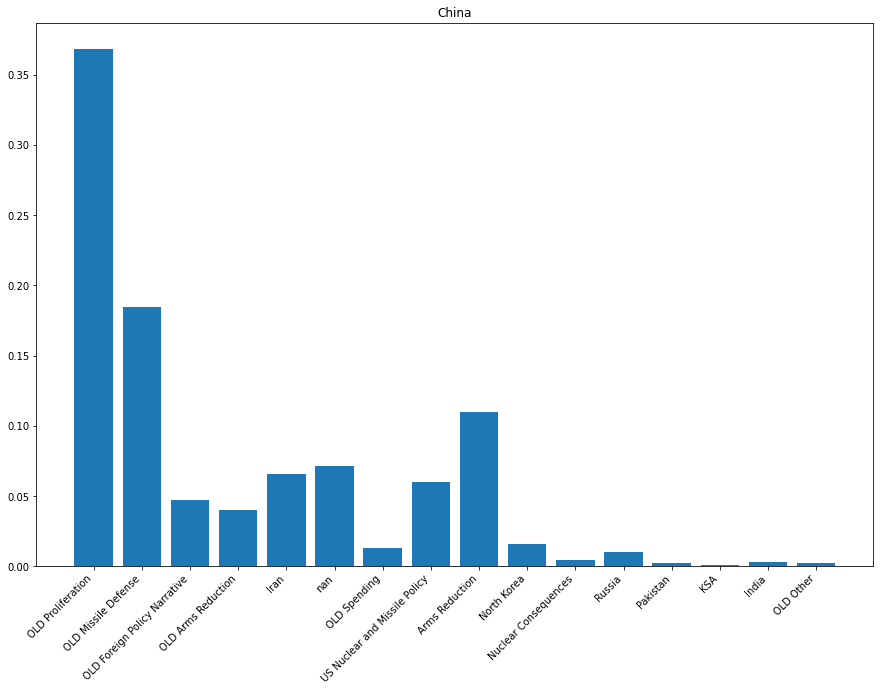

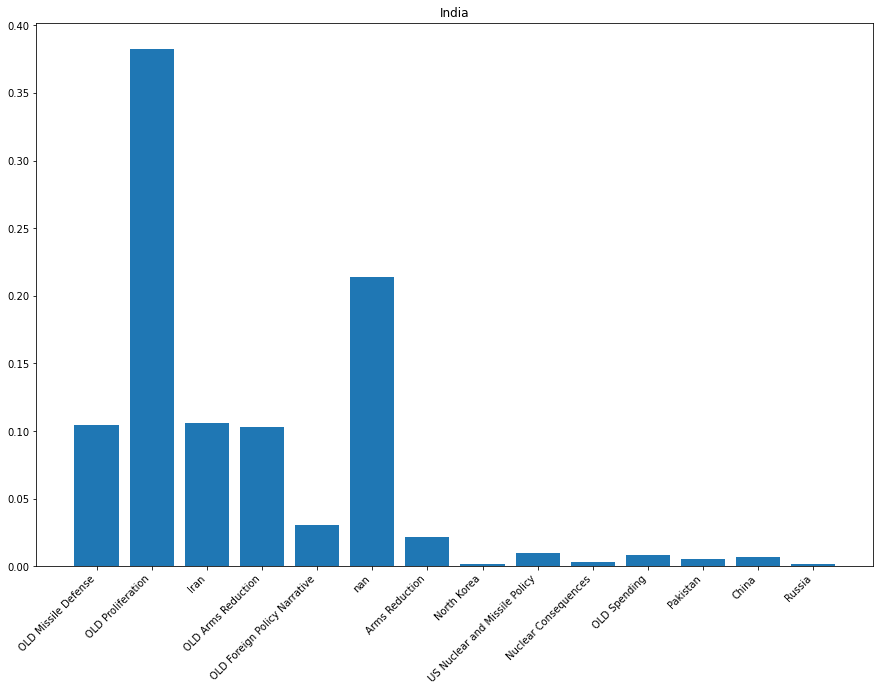

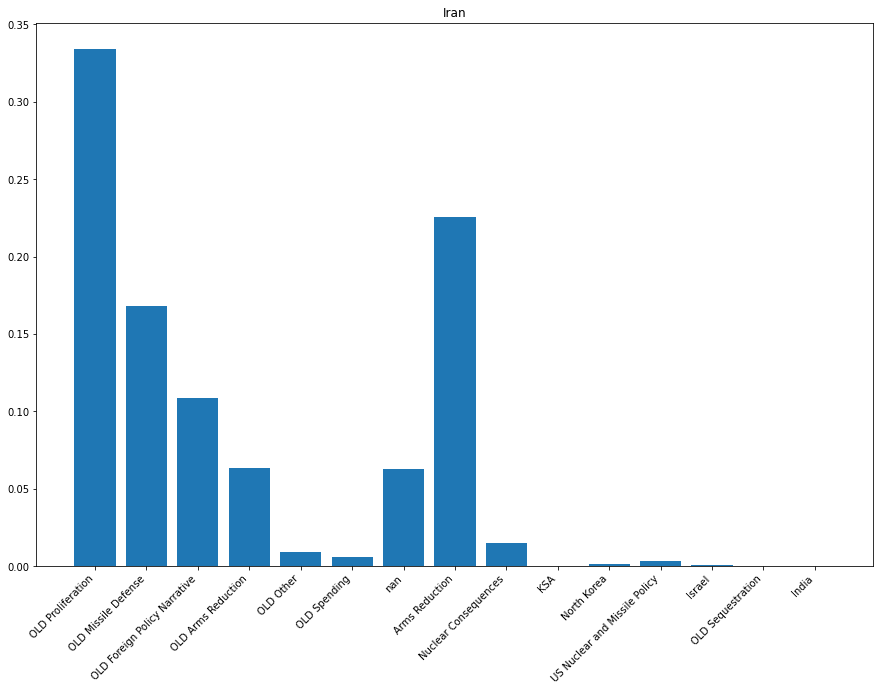

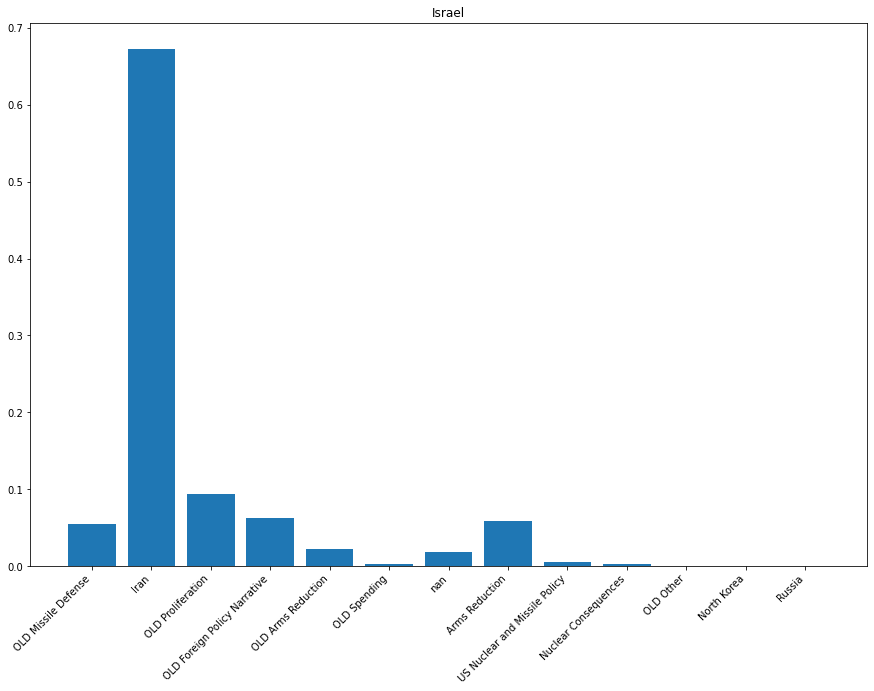

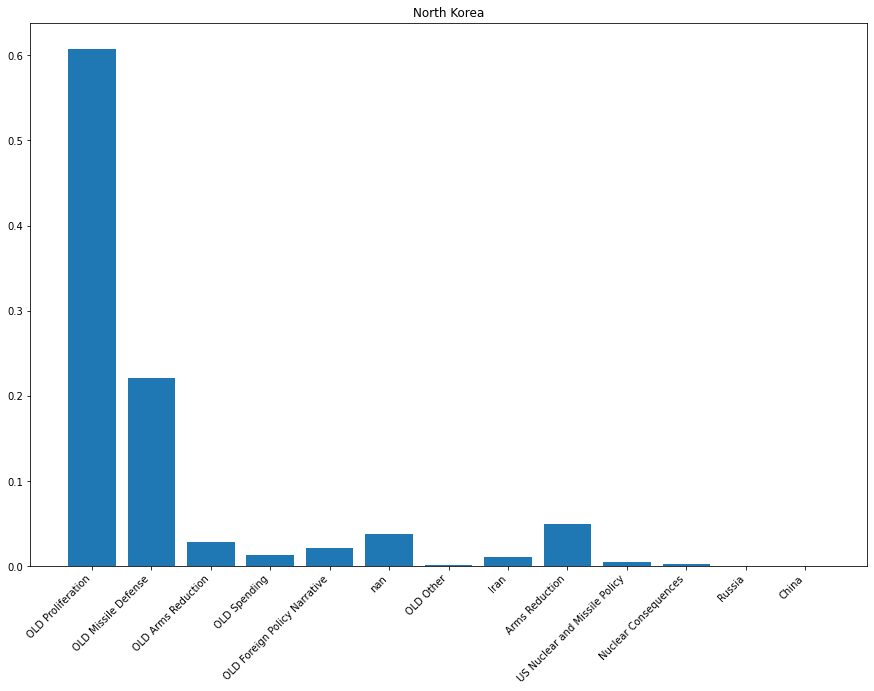

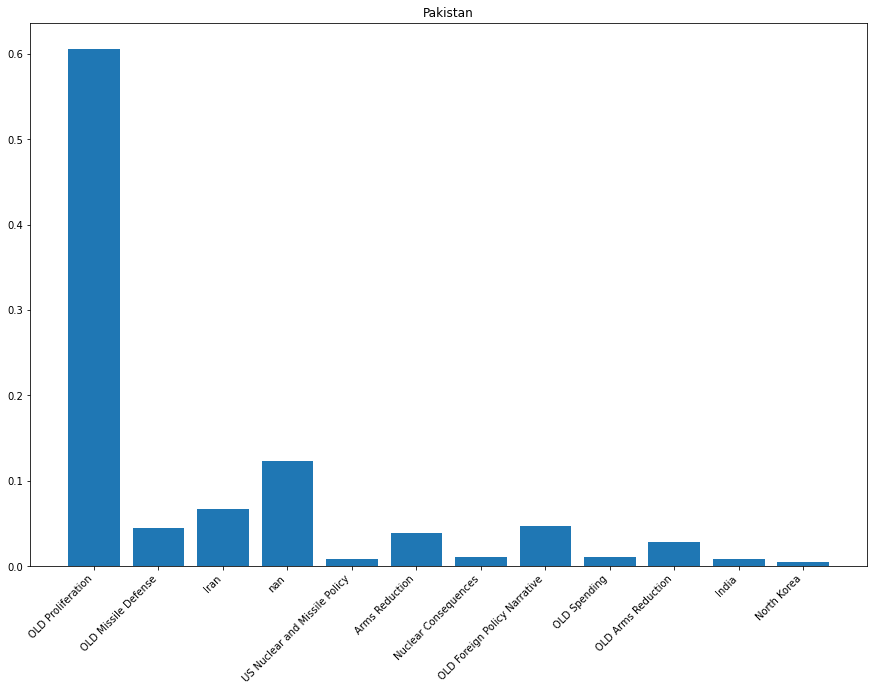

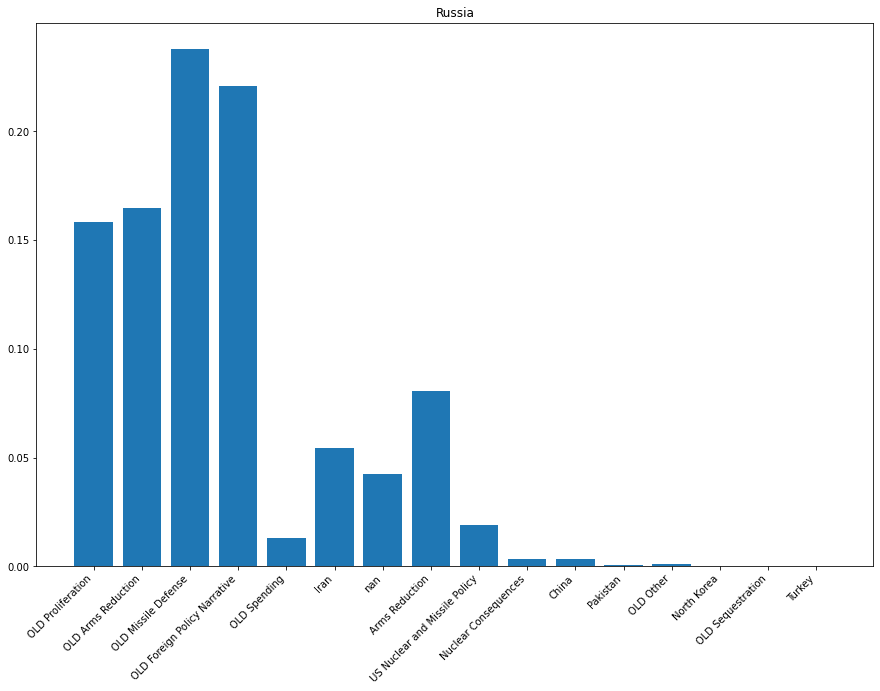

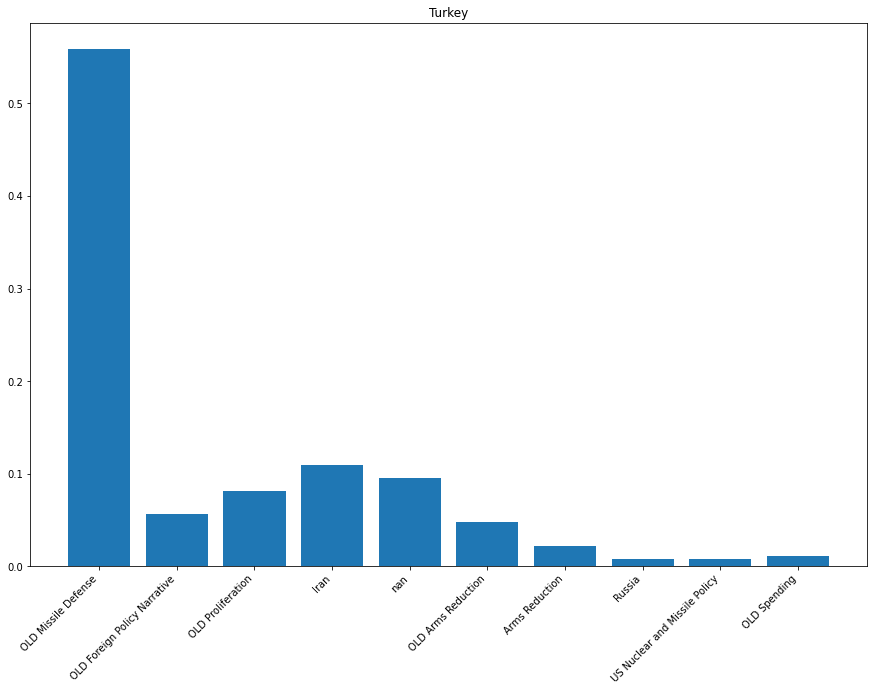

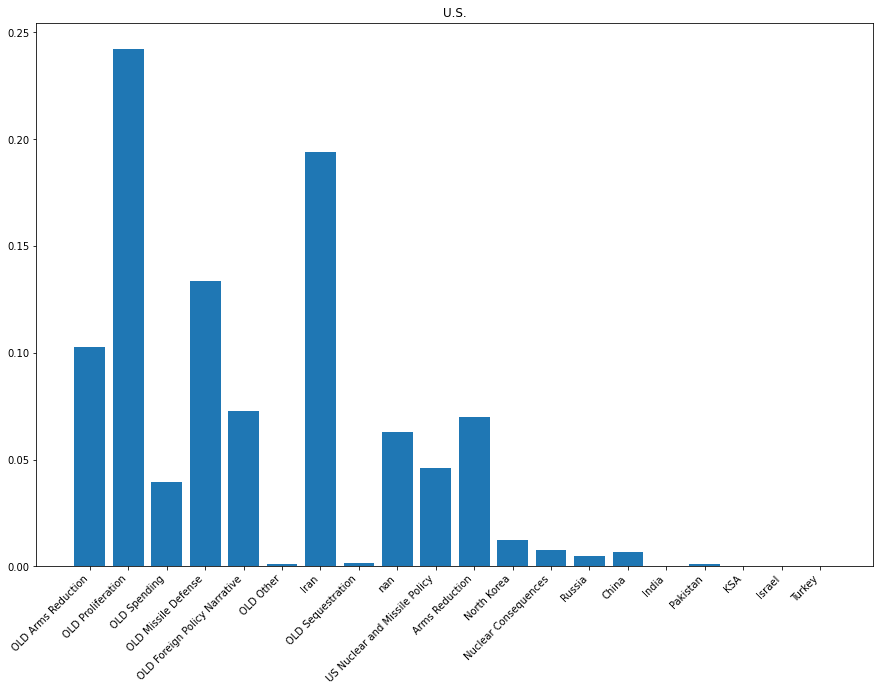

In [38]:
for index, row in full_text_false_message_list.iterrows():
    country = index
    freq = row["false_message_frequencies"]
    freq_df = pd.DataFrame(freq.items())
    plt.figure(figsize=(15,10))
    plt.bar(freq_df[0].astype(str), freq_df[1].astype(np.float16))
    plt.title(country)
    plt.xticks(rotation=45, ha='right')

## Country Frequency in Quote

In [39]:
merged_df.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...,North Korea makes deals and threats\r\n\r\nMed...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a...",North Korea makes deals and threats\r\n\r\nMed...
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table,North Korea makes deals and threats\r\n\r\nMed...
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy...",North Korea makes deals and threats\r\n\r\nMed...
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we...",North Korea makes deals and threats\r\n\r\nMed...


In [40]:
quote_text = merged_df[["Messages", "QText"]].drop_duplicates()
quote_text.head()

,Messages,QText
0,OLD Proliferation,the nuclear issue was separate and that Pyongy...
1,OLD Proliferation,"the country's ""cutting-edge"" nuclear weapons a..."
2,OLD Proliferation,That was not on the table
3,OLD Proliferation,"All our cutting-edge weapons, including our hy..."
4,OLD Proliferation,"despite the quibbles, Tuesday's discussions we..."


In [41]:
quote_text["most_frequent_country"] = quote_text["QText"].apply(get_most_frequent_country)
quote_text.head()

,Messages,QText,most_frequent_country
0,OLD Proliferation,the nuclear issue was separate and that Pyongy...,North Korea
1,OLD Proliferation,"the country's ""cutting-edge"" nuclear weapons a...",U.S.
2,OLD Proliferation,That was not on the table,North Korea
3,OLD Proliferation,"All our cutting-edge weapons, including our hy...",China
4,OLD Proliferation,"despite the quibbles, Tuesday's discussions we...",North Korea


In [42]:
freq_country_by_quote = quote_text.groupby("most_frequent_country").count()
freq_country_by_quote

,Messages,QText
most_frequent_country,,
China,9096,9247
India,981,1082
Iran,91377,92018
Israel,7475,7504
North Korea,188741,190289
Pakistan,815,842
Russia,15988,16279
Turkey,617,638
U.S.,35698,36272


In [43]:
quote_text["message_equal_country"] = quote_text["Messages"] == quote_text["most_frequent_country"]
quote_text.head()

,Messages,QText,most_frequent_country,message_equal_country
0,OLD Proliferation,the nuclear issue was separate and that Pyongy...,North Korea,False
1,OLD Proliferation,"the country's ""cutting-edge"" nuclear weapons a...",U.S.,False
2,OLD Proliferation,That was not on the table,North Korea,False
3,OLD Proliferation,"All our cutting-edge weapons, including our hy...",China,False
4,OLD Proliferation,"despite the quibbles, Tuesday's discussions we...",North Korea,False


In [44]:
df_country_is_message_quote_text = quote_text[quote_text["message_equal_country"]]
df_country_is_not_message_quote_text = quote_text[~quote_text["message_equal_country"]]
df_country_is_message_quote_text.head()

,Messages,QText,most_frequent_country,message_equal_country
3854,Iran,The benefits mean Iranians were spared an econ...,Iran,True
3856,Iran,Banks and businesses that use the U.S. financi...,Iran,True
3860,Iran,Iran's economy grew by 0.7% since the deal was...,Iran,True
3861,Iran,"In Germany, Iran continued ""illegal proliferat...",Iran,True
3862,Iran,Many Iranians remain frustrated with the pace ...,Iran,True


In [45]:
# proportions of values where message equal most frequent country
prop_country_equal_message_quote_text = df_country_is_message_quote_text.shape[0]/quote_text.shape[0]
print(prop_country_equal_message_quote_text)
prop_country_not_equal_message_quote_text = df_country_is_not_message_quote_text.shape[0]/quote_text.shape[0]
print(prop_country_not_equal_message_quote_text)

0.22923043041234203
0.770769569587658


In [46]:
quote_text_false_message_list = df_country_is_not_message_quote_text[["Messages", "most_frequent_country"]].groupby("most_frequent_country").agg(list)
quote_text_false_message_list

,Messages
most_frequent_country,
China,"[OLD Proliferation, OLD Missile Defense, OLD P..."
India,"[OLD Proliferation, OLD Missile Defense, OLD M..."
Iran,"[OLD Proliferation, OLD Missile Defense, OLD P..."
Israel,"[OLD Missile Defense, OLD Proliferation, OLD P..."
North Korea,"[OLD Proliferation, OLD Proliferation, OLD Pro..."
Pakistan,"[OLD Proliferation, OLD Proliferation, OLD Pro..."
Russia,"[OLD Arms Reduction, OLD Arms Reduction, OLD A..."
Turkey,"[OLD Missile Defense, OLD Missile Defense, OLD..."
U.S.,"[OLD Proliferation, OLD Arms Reduction, OLD Mi..."


In [47]:
quote_text_false_message_list["false_message_frequencies"] = quote_text_false_message_list["Messages"].apply(dict_freq_from_list)
quote_text_false_message_list

,Messages,false_message_frequencies
most_frequent_country,,
China,"[OLD Proliferation, OLD Missile Defense, OLD P...","{'OLD Proliferation': 0.44710064974868213, 'OL..."
India,"[OLD Proliferation, OLD Missile Defense, OLD M...","{'OLD Proliferation': 0.5061494796594135, 'OLD..."
Iran,"[OLD Proliferation, OLD Missile Defense, OLD P...","{'OLD Proliferation': 0.3269517814264391, 'OLD..."
Israel,"[OLD Missile Defense, OLD Proliferation, OLD P...","{'OLD Missile Defense': 0.04059139784946236, '..."
North Korea,"[OLD Proliferation, OLD Proliferation, OLD Pro...","{'OLD Proliferation': 0.3655359449907642, 'OLD..."
Pakistan,"[OLD Proliferation, OLD Proliferation, OLD Pro...","{'OLD Proliferation': 0.8073979591836735, nan:..."
Russia,"[OLD Arms Reduction, OLD Arms Reduction, OLD A...","{'OLD Arms Reduction': 0.18938108702481934, 'O..."
Turkey,"[OLD Missile Defense, OLD Missile Defense, OLD...","{'OLD Missile Defense': 0.5808477237048666, 'I..."
U.S.,"[OLD Proliferation, OLD Arms Reduction, OLD Mi...","{'OLD Proliferation': 0.27690780767534184, 'OL..."


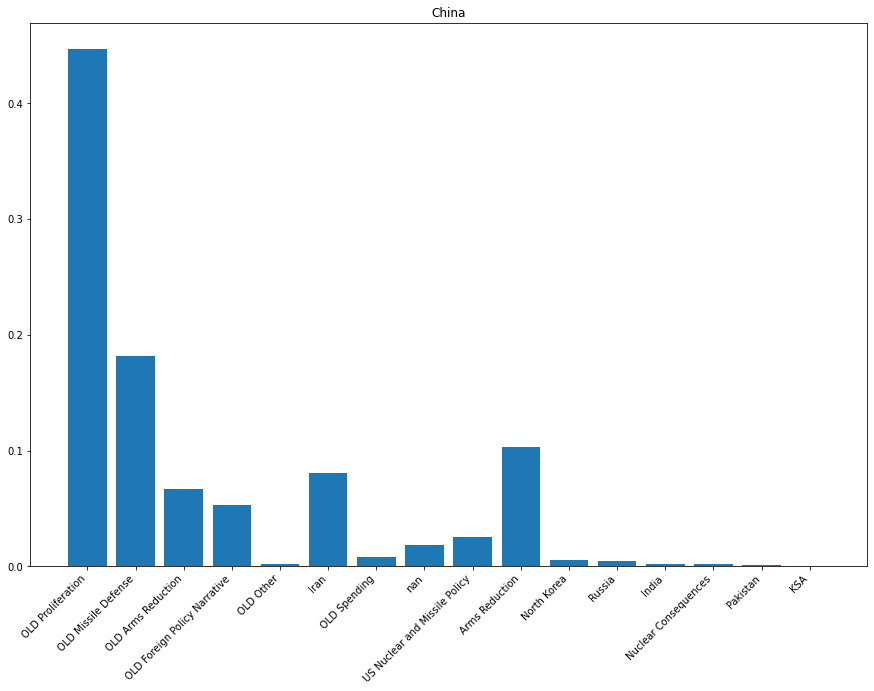

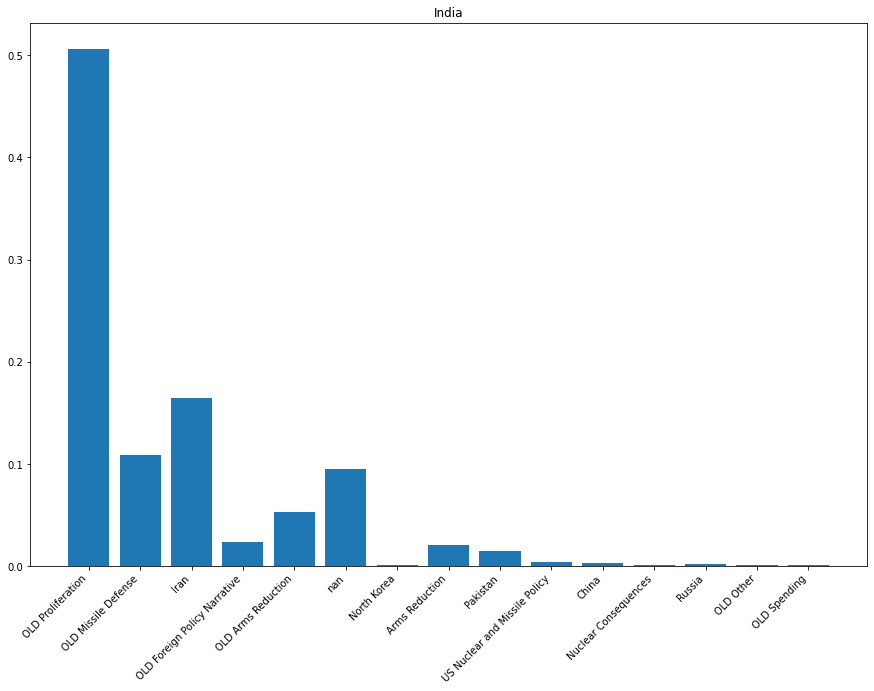

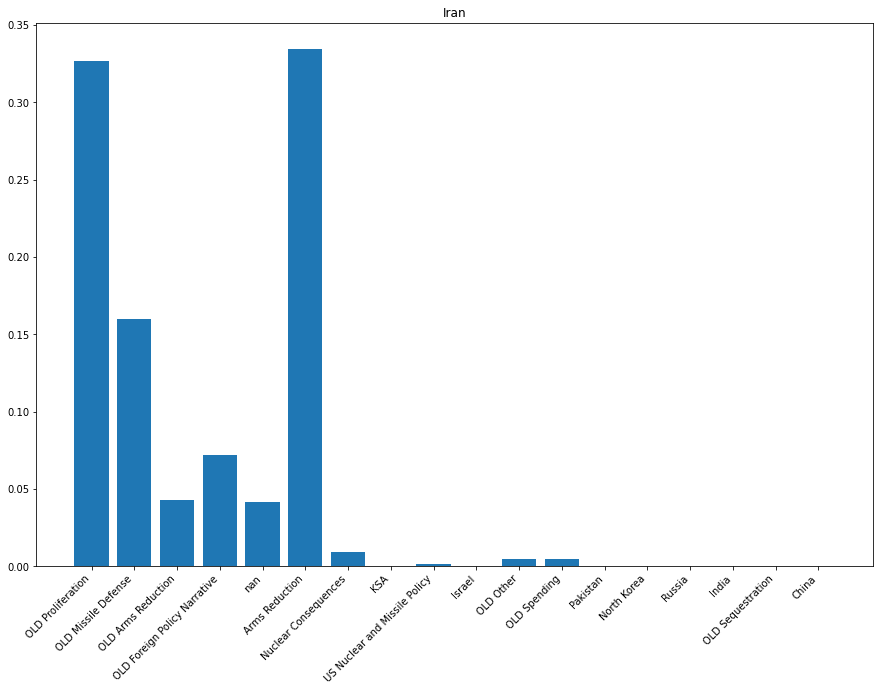

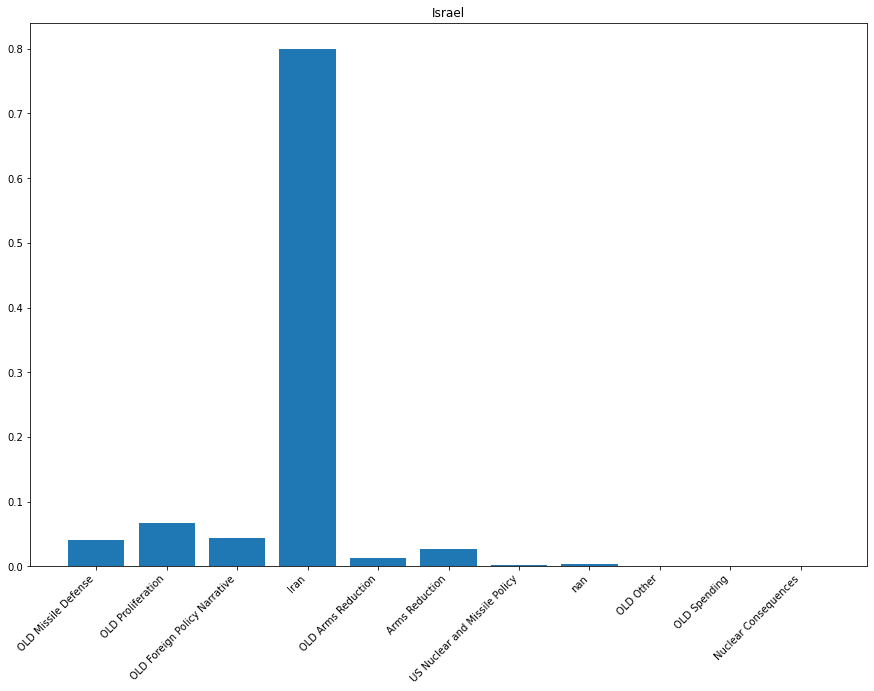

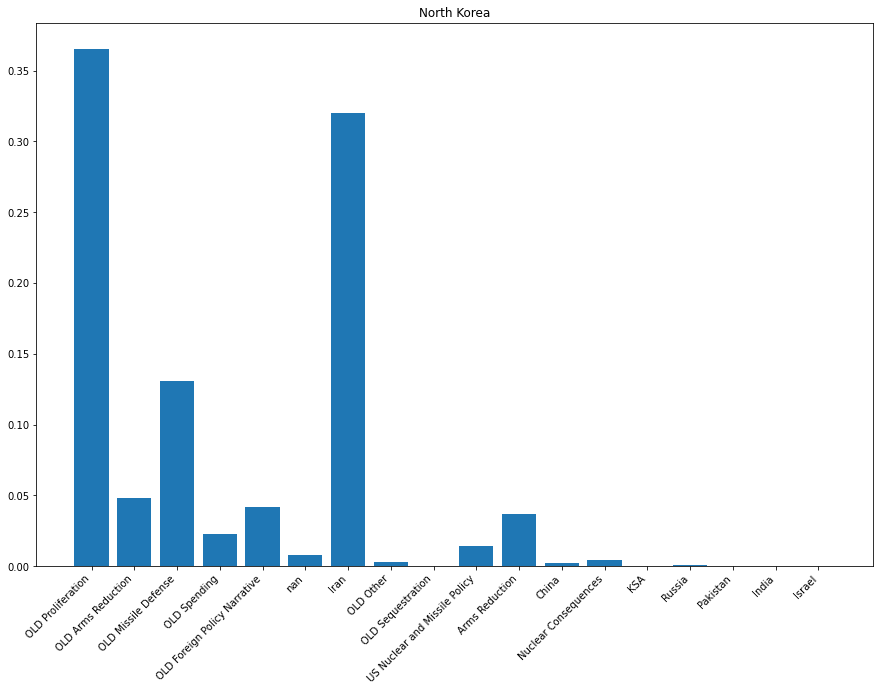

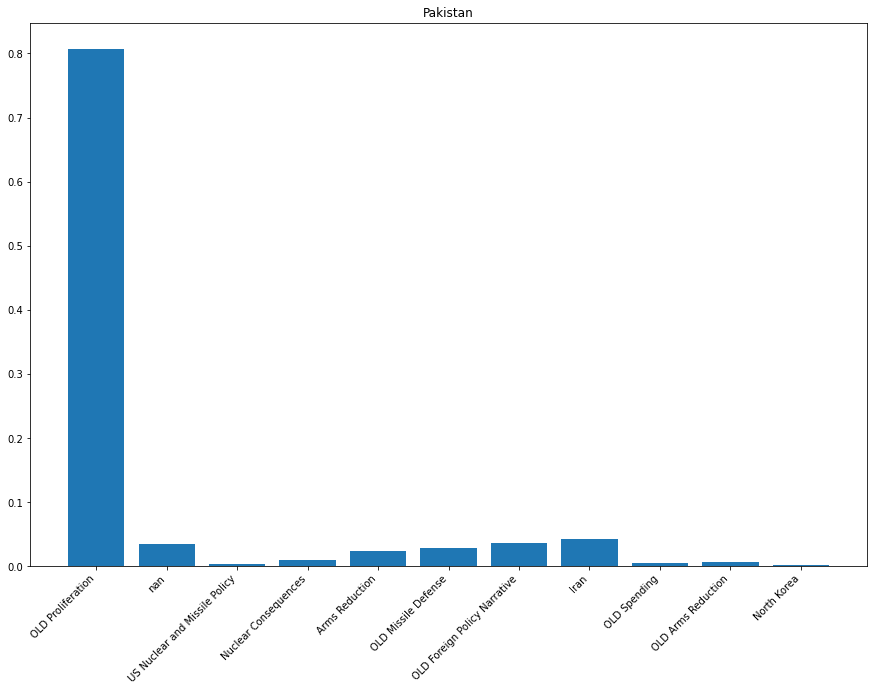

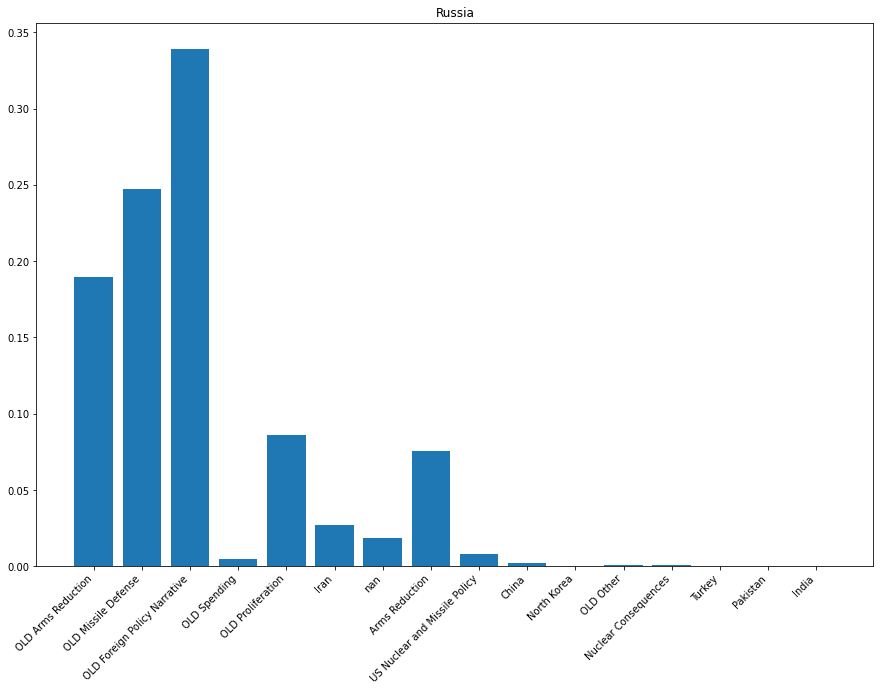

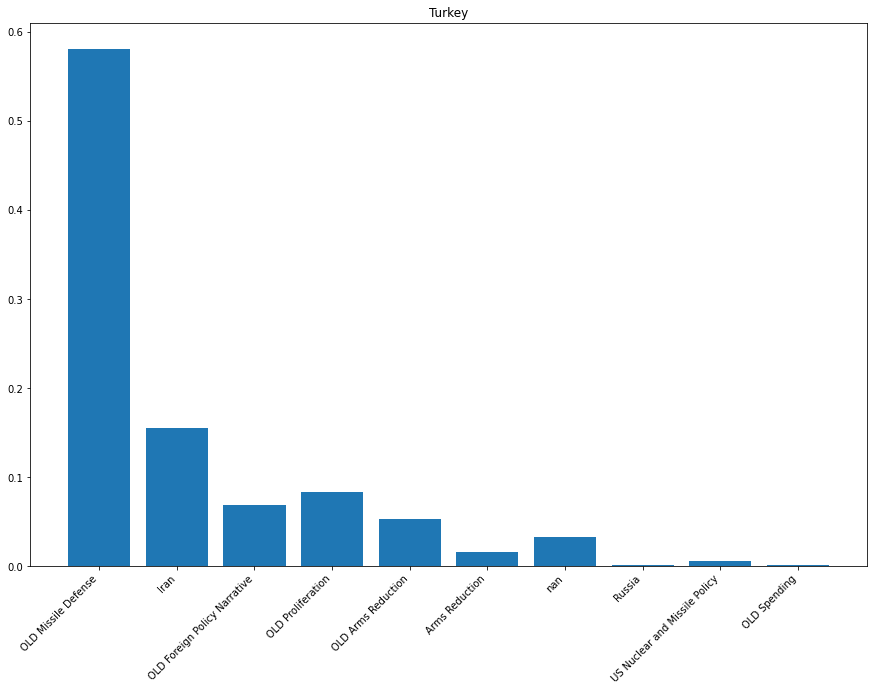

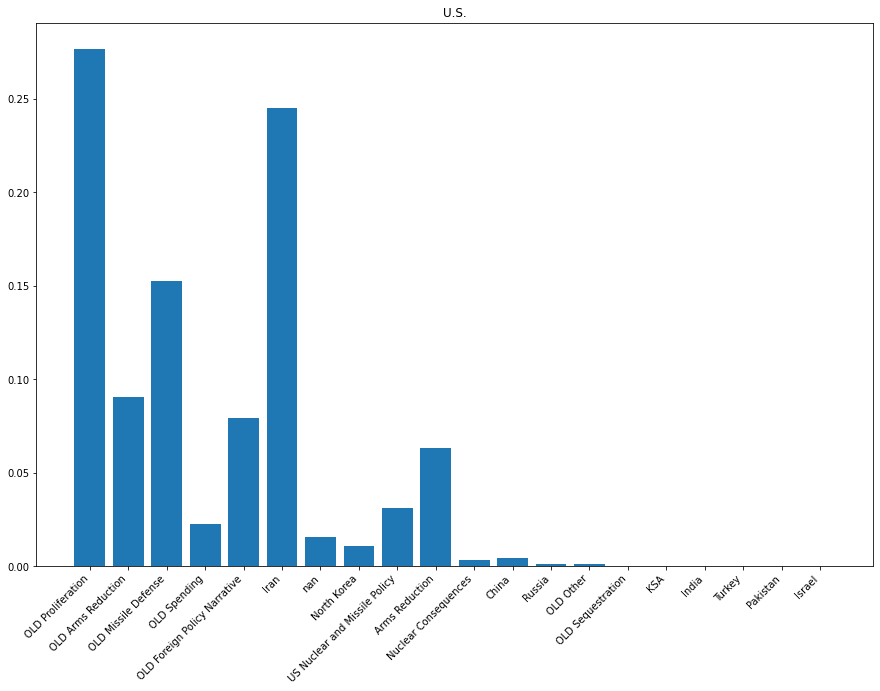

In [48]:
for index, row in quote_text_false_message_list.iterrows():
    country = index
    freq = row["false_message_frequencies"]
    freq_df = pd.DataFrame(freq.items())
    plt.figure(figsize=(15,10))
    plt.bar(freq_df[0].astype(str), freq_df[1].astype(np.float16))
    plt.title(country)
    plt.xticks(rotation=45, ha='right')

##### Thoughts
- interesting to see that these distributions of the false messges resemble that of the content level?
- some insights can be gathered 
- most frequent country is not necessarily the subject of the topic

## At what frequency of countries is this a good indicator?

In [49]:
merged_df.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...,North Korea makes deals and threats\r\n\r\nMed...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a...",North Korea makes deals and threats\r\n\r\nMed...
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table,North Korea makes deals and threats\r\n\r\nMed...
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy...",North Korea makes deals and threats\r\n\r\nMed...
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we...",North Korea makes deals and threats\r\n\r\nMed...


In [50]:
def is_message_country(msg):
    countries = ["China", "India", "Iran", "Israel", "North Korea", "OLD Iran", "Pakistan", "Russia", "Turkey", "KSA"]
    return msg in countries

message_is_country = merged_df["Messages"].apply(is_message_country)

In [51]:
country_data = merged_df[message_is_country]
print(country_data.shape[0])
country_data.head()

170217


,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content
3854,5157643,"A year after nuclear deal, taking stock of a...",8910511,Iran,OLD Negotiations,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,..."
3855,5157643,"A year after nuclear deal, taking stock of a...",8910526,Iran,OLD Negotiations,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,..."
3856,5157643,"A year after nuclear deal, taking stock of a...",8910521,Iran,OLD Sanctions,Banks and businesses that use the U.S. financi...,"Valley & State\r\nA year after nuclear deal,..."
3857,5157643,"A year after nuclear deal, taking stock of a...",8910520,Iran,OLD Negotiations,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,..."
3860,5157643,"A year after nuclear deal, taking stock of a...",8910524,Iran,OLD Negotiations,Iran's economy grew by 0.7% since the deal was...,"Valley & State\r\nA year after nuclear deal,..."


In [52]:
country_full_text = country_data[["Messages", "Content"]]
country_full_text.head()

,Messages,Content
3854,Iran,"Valley & State\r\nA year after nuclear deal,..."
3855,Iran,"Valley & State\r\nA year after nuclear deal,..."
3856,Iran,"Valley & State\r\nA year after nuclear deal,..."
3857,Iran,"Valley & State\r\nA year after nuclear deal,..."
3860,Iran,"Valley & State\r\nA year after nuclear deal,..."


In [53]:
country_full_text["country_freq"] = country_full_text["Content"].apply(find_country_freq)
country_full_text.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_67200/1243021773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_full_text["country_freq"] = country_full_text["Content"].apply(find_country_freq)


,Messages,Content,country_freq
3854,Iran,"Valley & State\r\nA year after nuclear deal,...","{'North Korea': 0.0, 'Iran': 0.734693877551020..."
3855,Iran,"Valley & State\r\nA year after nuclear deal,...","{'North Korea': 0.0, 'Iran': 0.734693877551020..."
3856,Iran,"Valley & State\r\nA year after nuclear deal,...","{'North Korea': 0.0, 'Iran': 0.734693877551020..."
3857,Iran,"Valley & State\r\nA year after nuclear deal,...","{'North Korea': 0.0, 'Iran': 0.734693877551020..."
3860,Iran,"Valley & State\r\nA year after nuclear deal,...","{'North Korea': 0.0, 'Iran': 0.734693877551020..."


In [54]:
def message_country_freq(row):
    country = row["Messages"]
    freq = row["country_freq"]
    return freq[country]

<AxesSubplot:ylabel='Frequency'>

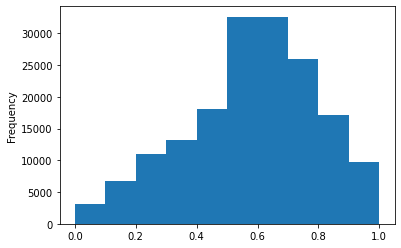

In [55]:
dist_freq_full = country_full_text.apply(message_country_freq, axis = 1)
dist_freq_full.plot.hist()

In [56]:
country_quote_text = country_data[["Messages", "QText"]]
country_quote_text["country_freq"] = country_quote_text["QText"].apply(find_country_freq)
country_quote_text.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_67200/3564878184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_quote_text["country_freq"] = country_quote_text["QText"].apply(find_country_freq)


,Messages,QText,country_freq
3854,Iran,The benefits mean Iranians were spared an econ...,"{'North Korea': 0.0, 'Iran': 1.0, 'China': 0.0..."
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0..."
3856,Iran,Banks and businesses that use the U.S. financi...,"{'North Korea': 0.0, 'Iran': 0.666666666666666..."
3857,Iran,the deal made the world safer,"{'North Korea': 0, 'Iran': 0, 'China': 0, 'Ind..."
3860,Iran,Iran's economy grew by 0.7% since the deal was...,"{'North Korea': 0.0, 'Iran': 1.0, 'China': 0.0..."


<AxesSubplot:ylabel='Frequency'>

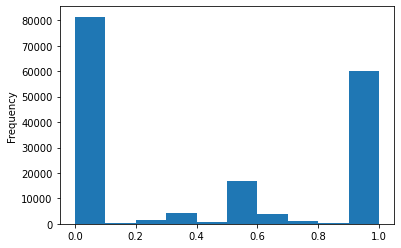

In [57]:
dist_freq_quote = country_quote_text.apply(message_country_freq, axis = 1)
dist_freq_quote.plot.hist()

Frequency of country in full text is probably better indicator than the country frequency in the quote? 

## First Sentence

In [58]:
def first_sentence(string):
    no_acronyms = re.sub(r"(?<!\w)([A-Z])\.", r"\1", string)
    pattern = r"^([^.!?]+)"
    found_lst = re.findall(pattern, no_acronyms)
    if len(found_lst) > 0:
        return found_lst[0]
    else:
        return ""

In [59]:
merged_df["first sentence"] = merged_df["Content"].apply(first_sentence)
merged_df.head()

,Article ID,Headline,Quote ID,Messages,Submessages,QText,Content,first sentence
0,3759306,North Korea makes deals and threats,7023849,OLD Proliferation,OLD State Level Nuclear Programs,the nuclear issue was separate and that Pyongy...,North Korea makes deals and threats\r\n\r\nMed...,North Korea makes deals and threats\r\n\r\nMed...
1,3759306,North Korea makes deals and threats,7023842,OLD Proliferation,OLD State Level Nuclear Programs,"the country's ""cutting-edge"" nuclear weapons a...",North Korea makes deals and threats\r\n\r\nMed...,North Korea makes deals and threats\r\n\r\nMed...
2,3759306,North Korea makes deals and threats,7023839,OLD Proliferation,OLD State Level Nuclear Programs,That was not on the table,North Korea makes deals and threats\r\n\r\nMed...,North Korea makes deals and threats\r\n\r\nMed...
3,3759306,North Korea makes deals and threats,7023833,OLD Proliferation,OLD State Level Nuclear Programs,"All our cutting-edge weapons, including our hy...",North Korea makes deals and threats\r\n\r\nMed...,North Korea makes deals and threats\r\n\r\nMed...
4,3759306,North Korea makes deals and threats,7023846,OLD Proliferation,OLD State Level Nuclear Programs,"despite the quibbles, Tuesday's discussions we...",North Korea makes deals and threats\r\n\r\nMed...,North Korea makes deals and threats\r\n\r\nMed...


In [60]:
merged_df["first sentence"][0]

'North Korea makes deals and threats\r\n\r\nMedia: The Washington Post\r\nByline: Anna Fifield\r\nDate: 10 January 2018\r\n\r\nSEOUL - North Korea\'s representatives assured the South Korean government Tuesday that the country\'s "cutting-edge" nuclear weapons are aimed only at the United States, not at its neighbors, as they struck a deal to send athletes to next month\'s Winter Olympics and to reopen a military hotline'

##### first sentence seem to include headline, is it good?

In [61]:
def has_country_in_text(row):
    country = row["Messages"]
    text = row["first sentence"]
    print(country, text)
    return country in text

In [291]:
first_sentence_df = merged_df[["Messages", "first sentence"]].drop_duplicates()

In [286]:
# first_sentence_df["first_has_country"] = first_sentence_df.apply(lambda x: x["Messages"].astype(str) in x["first sentence"].astype(str), axis=1)
# first_sentence_df.head()

In [ ]:
# first_sentence_has_message_count = headline_message_df[["Article ID", "head_has_country"]].groupby("head_has_country").count()
# first_sentence_has_message_count

# Next Steps

- Country in surrounding text of the quote